Kişisel demografik bilgilere dayanarak, bir bireyin gelirinin 50K’yı geçip geçmediği

Based on personal demographic information, whether an individual's income exceeds 50K

In [43]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


In [44]:
pd.set_option('display.max_columns',None)
#display.max_columns',None)#bütün columns ları gösterito


In [45]:
main_df=pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data")
main_df.columns = [ "age", "workclass", "fnlwgt", "edu", "edu_num", "marital",
    "job", "relationship", "race", "sex", "cap_gain", "cap_loss",
    "hours", "country", "income"]


In [46]:
main_df.head()

,age,workclass,fnlwgt,edu,edu_num,marital,job,relationship,race,sex,cap_gain,cap_loss,hours,country,income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [47]:
main_df.describe()

,age,fnlwgt,edu_num,cap_gain,cap_loss,hours
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [48]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   age           32560 non-null  int64 
 1   workclass     32560 non-null  object
 2   fnlwgt        32560 non-null  int64 
 3   edu           32560 non-null  object
 4   edu_num       32560 non-null  int64 
 5   marital       32560 non-null  object
 6   job           32560 non-null  object
 7   relationship  32560 non-null  object
 8   race          32560 non-null  object
 9   sex           32560 non-null  object
 10  cap_gain      32560 non-null  int64 
 11  cap_loss      32560 non-null  int64 
 12  hours         32560 non-null  int64 
 13  country       32560 non-null  object
 14  income        32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [49]:
include_list=['age','workclass']
drop_list=['country','edu','fnlwgt','job','relationship','race','cap_loss']

In [50]:
main_df=main_df.drop(columns = drop_list)

In [51]:
main_df

,age,workclass,edu_num,marital,sex,cap_gain,hours,income
0,50,Self-emp-not-inc,13,Married-civ-spouse,Male,0,13,<=50K
1,38,Private,9,Divorced,Male,0,40,<=50K
2,53,Private,7,Married-civ-spouse,Male,0,40,<=50K
3,28,Private,13,Married-civ-spouse,Female,0,40,<=50K
4,37,Private,14,Married-civ-spouse,Female,0,40,<=50K
...,...,...,...,...,...,...,...,...
32555,27,Private,12,Married-civ-spouse,Female,0,38,<=50K
32556,40,Private,9,Married-civ-spouse,Male,0,40,>50K
32557,58,Private,9,Widowed,Female,0,40,<=50K
32558,22,Private,9,Never-married,Male,0,20,<=50K


is age make a diffrence to a income?

In [52]:
print(main_df['income'].dtype)

object


In [53]:
main_df['income'].value_counts()

income
<=50K    24719
>50K      7841
Name: count, dtype: int64

In [54]:
#main_df['income'] = main_df['income'].astype(str).str.strip().replace({"<=50K": 0, ">50K": 1}).astype(int)
main_df['income'] = main_df['income'].astype(str).str.strip().replace({"<=50K": 0,">50K": 1 }).astype(int)

/tmp/ipykernel_29920/404459634.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  main_df['income'] = main_df['income'].astype(str).str.strip().replace({"<=50K": 0,">50K": 1 }).astype(int)


astype(str)                                                        
Tüm değerleri string (metin) tipine çevirir.

Bazı satırlarda veri object görünebilir ama içinde:

int float None karışık tipler olabilir.

.str.strip()

 Stringlerin başındaki ve sonundaki boşlukları temizler.

Mesela:

" <=50K" → "<=50K"

">50K " → ">50K"

" <=50K " → "<=50K"

Datasette boşluk görünmüyor gibi durabilir ama çok sık olur. Bu boşluklar yüzünden == "<=50K" kıyaslaması tutmaz.

replace şunun için güçlüdür:

Eşleşmeyen değerleri NaN yapmaz (map yapar).

Sadece eşleşenleri dönüştürür.

In [55]:
main_df['income'].value_counts()

income
0    24719
1     7841
Name: count, dtype: int64

In [56]:
main_df.groupby('age')['income'].mean().sort_values(ascending=False)

age
50    0.433555
54    0.416867
79    0.409091
53    0.407328
47    0.406780
        ...   
82    0.000000
85    0.000000
86    0.000000
87    0.000000
88    0.000000
Name: income, Length: 73, dtype: float64

In [57]:
main_df.groupby('income')['age'].median()

income
0    34.0
1    44.0
Name: age, dtype: float64

In [58]:
main_df.groupby('income')['age'].mean()

income
0    36.783648
1    44.249841
Name: age, dtype: float64

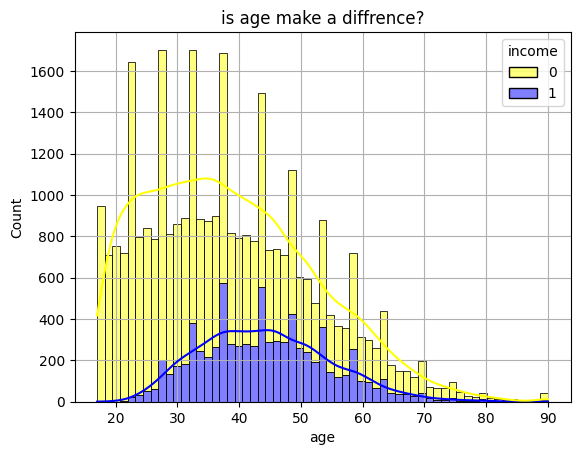

In [59]:
plt.figure(6.6)
sns.histplot(data=main_df,x='age',hue='income',kde='age',palette=["yellow","blue"],multiple='stack')
plt.title('is age make a diffrence?')
plt.grid()


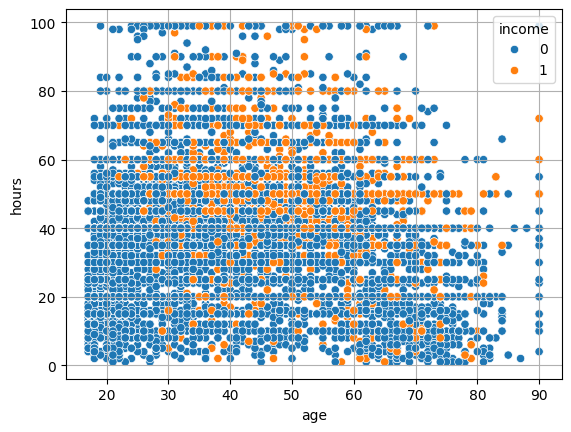

In [60]:
sns.scatterplot(data=main_df,x='age',y='hours',hue='income')
plt.grid()

In [61]:
main_df['age'].corr(main_df['income'])

np.float64(0.23403877652659216)

is workclass related to the income

In [62]:
main_df['workclass'].value_counts()

workclass
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1297
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64

In [63]:
#main_df=pd.get_dummies(main_df, columns=['workclass','sex'],drop_first=True,dtype=int)
#bunu denedim ama kötü oldu / ı tried this metod but it comes out looking bad

In [64]:
main_df

,age,workclass,edu_num,marital,sex,cap_gain,hours,income
0,50,Self-emp-not-inc,13,Married-civ-spouse,Male,0,13,0
1,38,Private,9,Divorced,Male,0,40,0
2,53,Private,7,Married-civ-spouse,Male,0,40,0
3,28,Private,13,Married-civ-spouse,Female,0,40,0
4,37,Private,14,Married-civ-spouse,Female,0,40,0
...,...,...,...,...,...,...,...,...
32555,27,Private,12,Married-civ-spouse,Female,0,38,0
32556,40,Private,9,Married-civ-spouse,Male,0,40,1
32557,58,Private,9,Widowed,Female,0,40,0
32558,22,Private,9,Never-married,Male,0,20,0


first of all we need the create dcitionary


In [65]:
my_value = {
    'Private': 0,
    'Self-emp-not-inc': 0,
    'Self-emp-inc': 0,
    'Local-gov': 1,
    'State-gov': 1,
    'Federal-gov': 1,
    '?': 2,
    'Without-pay': 2,
    'Never-worked': 2
}

In [66]:
main_df['workclass'] = main_df['workclass'].astype(str).str.strip()

In [67]:
main_df['workclass']=main_df['workclass'].map(my_value)


In [68]:
main_df['workclass'].value_counts()

workclass
0    26353
1     4350
2     1857
Name: count, dtype: int64

In [69]:
main_df['workclass'].corr(main_df['income'])

np.float64(-0.028694201143803437)

In [70]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        32560 non-null  int64 
 1   workclass  32560 non-null  int64 
 2   edu_num    32560 non-null  int64 
 3   marital    32560 non-null  object
 4   sex        32560 non-null  object
 5   cap_gain   32560 non-null  int64 
 6   hours      32560 non-null  int64 
 7   income     32560 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 2.0+ MB


<Axes: >

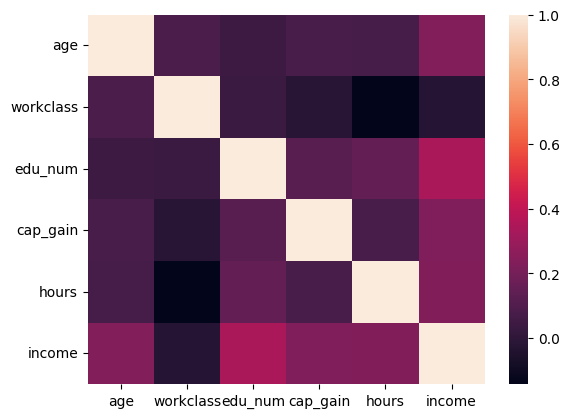

In [71]:

sns.heatmap(main_df[['age','workclass','edu_num','cap_gain','hours','income']].corr())
#sns.heatmap(main_df[['age','duration', "cons.price.idx",'cons.conf.idx', 'euribor3m','emp.var.rate']].corr())


In [72]:
main_df.groupby("workclass")["income"].value_counts()

workclass  income
0          0         20044
           1          6309
1          0          3009
           1          1341
2          0          1666
           1           191
Name: count, dtype: int64

In [73]:
main_df.groupby("income")["workclass"].value_counts()

income  workclass
0       0            20044
        1             3009
        2             1666
1       0             6309
        1             1341
        2              191
Name: count, dtype: int64

<Axes: xlabel='workclass', ylabel='hours'>

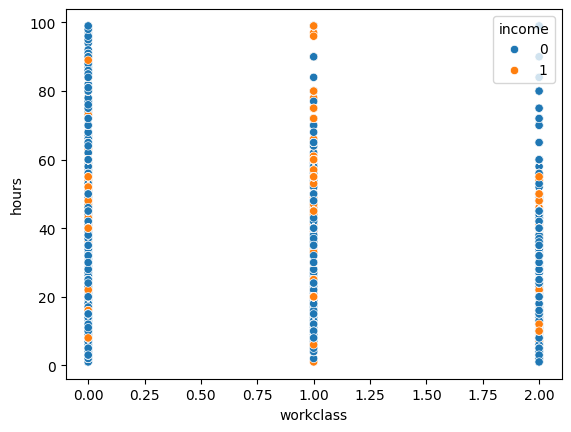

In [74]:
sns.scatterplot(data=main_df,x="workclass",y="hours",hue="income")

<Axes: xlabel='workclass', ylabel='Count'>

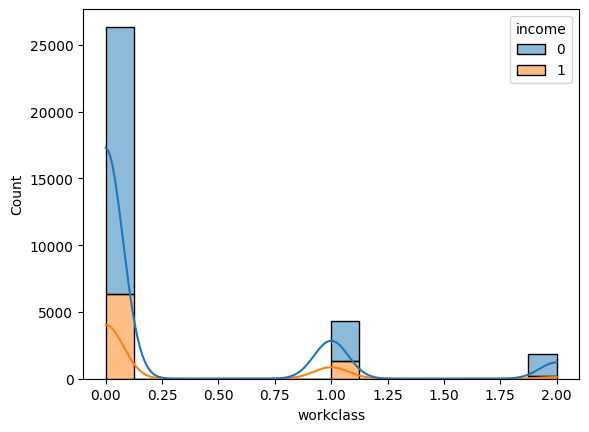

In [75]:
sns.histplot(data=main_df,x='workclass',hue='income',multiple='stack',kde='income')

is edu_num related to income?

In [76]:
main_df['edu_num'].value_counts()

edu_num
9     10501
10     7291
13     5354
14     1723
11     1382
7      1175
12     1067
6       933
4       646
15      576
5       514
8       433
16      413
3       333
2       168
1        51
Name: count, dtype: int64

In [77]:
main_df.groupby('edu_num')['income'].value_counts()

edu_num  income
1        0           51
2        0          162
         1            6
3        0          317
         1           16
4        0          606
         1           40
5        0          487
         1           27
6        0          871
         1           62
7        0         1115
         1           60
8        0          400
         1           33
9        0         8826
         1         1675
10       0         5904
         1         1387
11       0         1021
         1          361
12       0          802
         1          265
13       0         3133
         1         2221
14       1          959
         0          764
15       1          423
         0          153
16       1          306
         0          107
Name: count, dtype: int64

In [78]:
main_df.groupby('income')['edu_num'].value_counts()

income  edu_num
0       9          8826
        10         5904
        13         3133
        7          1115
        11         1021
        6           871
        12          802
        14          764
        4           606
        5           487
        8           400
        3           317
        2           162
        15          153
        16          107
        1            51
1       13         2221
        9          1675
        10         1387
        14          959
        15          423
        11          361
        16          306
        12          265
        6            62
        7            60
        4            40
        8            33
        5            27
        3            16
        2             6
Name: count, dtype: int64

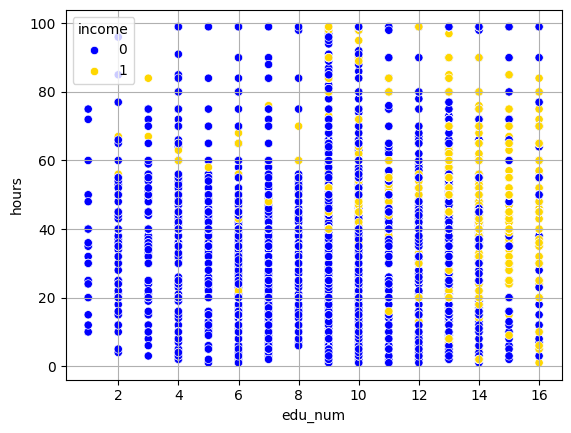

In [83]:
sns.scatterplot(data=main_df,x='edu_num',y='hours',hue='income',palette=('blue','gold'))
plt.grid()

<Axes: xlabel='edu_num'>

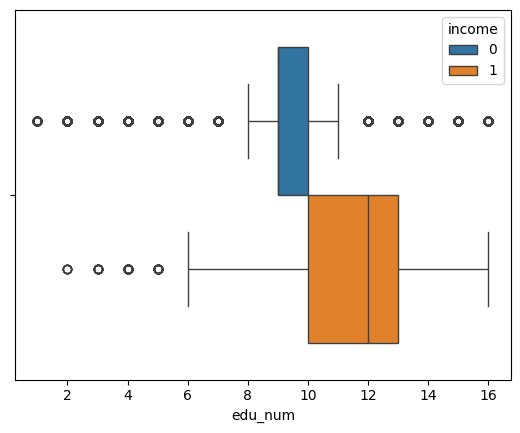

In [84]:
sns.boxplot(data=main_df,x='edu_num',hue='income')

<Axes: xlabel='edu_num'>

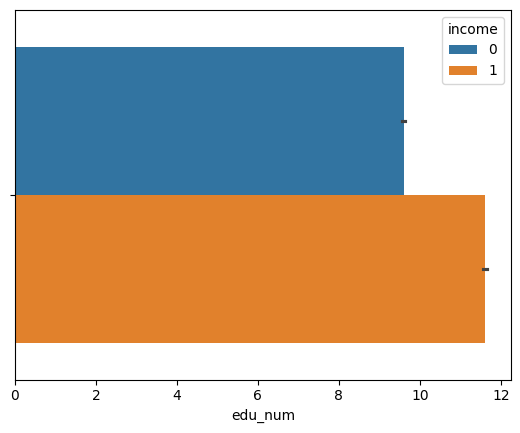

In [85]:
sns.barplot(data=main_df,x='edu_num',hue='income')